In [157]:
# see https://www.beerfestboots.com/fuck-the-dealer-rules
%pylab inline
import random

def multimode(x):
    if len(x) == 0:
        return []
    mx = max(x)
    return list(filter(lambda i: x[i] == mx, range(len(x))))

Populating the interactive namespace from numpy and matplotlib


In [190]:
# return a pivot, a high, and a low
def get_player_move(remain):
    # guess the median for the pivot
    cc = []
    for i,r in enumerate(remain):
        if r != 0:
            cc += [i]*r
    p = sorted(cc)[len(cc)//2]
    
    cl = multimode(remain[0:p])
    ch = [x+p+1 for x in multimode(remain[p+1:])]
    if len(cl) == 0:
        cl = [None]
    if len(ch) == 0:
        ch = [None]
    #print(cl, ch)
    
    return p, random.choice(cl), random.choice(ch)

In [191]:
NUM_PLAYERS = 12

def simulate():
    deck = []
    for suits in range(4):
        for cards in range(13):
            # suits don't matter
            deck.append(cards)
    random.shuffle(deck)

    # initial
    dealer_num = 0
    dealer_count = 0
    player_num = 1

    remain = [4]*13
    drinks = [0]*NUM_PLAYERS

    last_correct = 0

    while len(deck) != 0:
        mc = deck.pop()

        # player strategy in that function
        p,l,h = get_player_move(remain)
        pg = l if mc < p else h
        if mc == p:
            drinks[dealer_num] += 4
            last_correct = 0
        elif mc == pg:
            # lower
            drinks[dealer_num] += 2
            last_correct = 0
        else:
            # miss
            drinks[player_num] += abs(pg - mc)
            last_correct += 1

        if last_correct == 3:
            # dealer advance
            dealer_num += 1
            dealer_num %= NUM_PLAYERS
            last_correct = 0
            dealer_count += 1

        # advance player
        player_num += 1
        if player_num == dealer_num:
            player_num += 1
        player_num %= NUM_PLAYERS

        remain[mc] -= 1
    
    return drinks, dealer_num, dealer_count

simulate()

([19, 6, 19, 5, 11, 12, 11, 23, 7, 9, 7, 7], 7, 7)

In [ ]:
adn = []
add = [0]*NUM_PLAYERS
for i in range(10000):
    drinks, dealer_num, dealer_count = simulate()
    adn.append(dealer_count)
    add[dealer_num] += 1

6.029

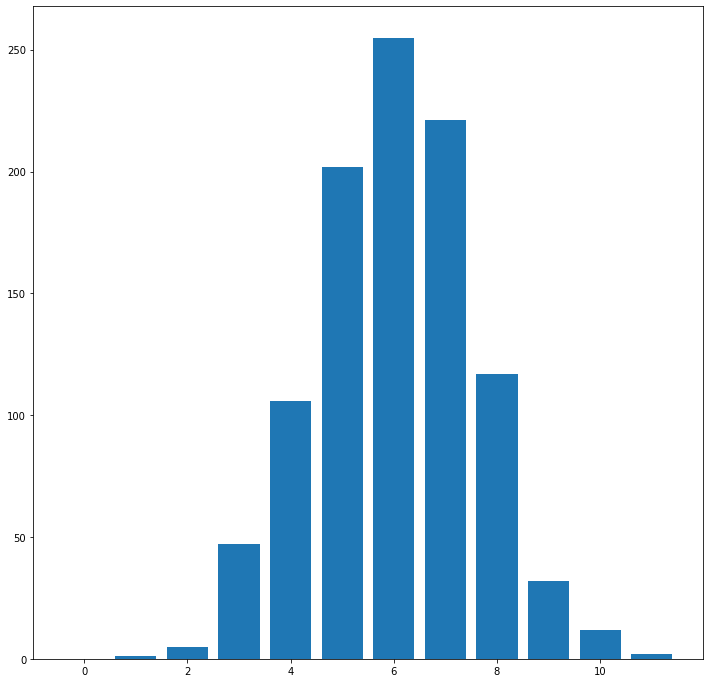

In [195]:
figsize(12,12)
plt.bar(range(len(add)), add)
np.mean(adn)